In [1]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.cluster import KMeans
files.upload()
# pairwise_distance para obtener la distancia a los centroides (solo quedarme con el centroide del grupo al que quiero calcular la distancia)

Saving trainingsetSVM2.csv to trainingsetSVM2.csv
Saving trainingsetSVM1.csv to trainingsetSVM1.csv
Saving trainingsetPCA.csv to trainingsetPCA.csv
Saving trainingsetkmeans.csv to trainingsetkmeans.csv


{'trainingsetSVM2.csv': b'X1,X2,X3,Y\r\n-0.271746509604376,-0.732498267650506,0.117293374862201,-1\r\n-1.48216682835934,-0.735267842331458,0.0404942326004595,-1\r\n0.737796550492797,-0.461844022076243,0.108968231677594,1\r\n1.05883001380357,0.821558052889737,0.064834566603613,-1\r\n0.407882008104799,-0.316045636298422,0.139317001684128,-1\r\n0.623875683619164,-0.607756870227094,0.108916721972039,1\r\n-1.43460300775719,0.407951565156188,0.0523327870391373,-1\r\n-0.621921544228392,-0.408435812678956,0.120671877079916,-1\r\n0.05551423340704,0.00287496187945006,0.158909230971211,-1\r\n-0.584090557281058,1.56357064894087,0.0395245001229809,-1\r\n-1.26841875243584,-0.229311856043443,0.0693484074916168,-1\r\n-0.664463640587017,2.04086063505602,0.0159039289405598,-1\r\n0.0642517757894716,1.36533049181496,0.0625365003130693,-1\r\n-0.692004568923506,-0.100601127956378,0.124634163902515,-1\r\n0.64248583055546,0.435122801704552,0.117779974976757,-1\r\n0.375705674707661,-0.693626880381277,0.1165991

1.1. Realice un script de Python que represente los datos en una figura e indique el número de agrupaciones que observa.

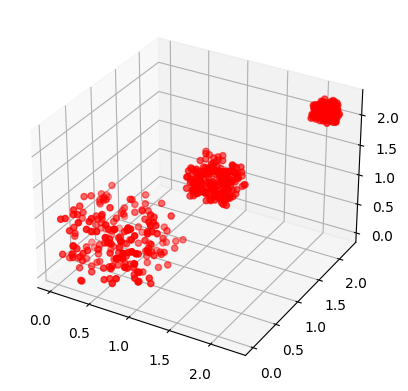

Se observan 3 agrupaciones


In [2]:
dataKmeans = pd.read_csv('trainingsetkmeans.csv')

# Crear la figura
fig = plt.figure()

# Añadir ejes 3D a la figura
ax = fig.add_subplot(111, projection='3d')

# Crear el gráfico de dispersión tridimensional
ax.scatter(dataKmeans.iloc[:, 0], dataKmeans.iloc[:, 1], dataKmeans.iloc[:, 2], c='r', marker='o')

# Mostrar el gráfico
plt.show()

print("Se observan 3 agrupaciones")

1.2. A continuación genere el modelo K-Means mediante la función de alto nivel de Scikit-Learn, incluyendo el número de agrupaciones que ha observado para detectarlas automáticamente. Posteriormente represente de nuevo los datos en una figura etiquetándolos con la clase a la que pertenece cada uno.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


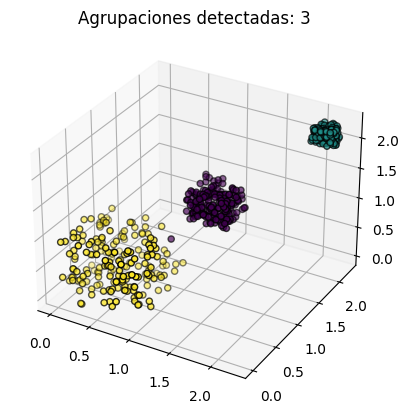

In [3]:
# Aplicar K-means para la agrupación
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(dataKmeans)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_


# Crear la figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dataKmeans.iloc[:, 0], dataKmeans.iloc[:, 1], dataKmeans.iloc[:, 2], c=labels, cmap='viridis', marker='o', edgecolor='black')

# Marcar los centroides de los grupos
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x', s=200, linewidths=3, color='white')

# Mostrar la figura
plt.title(f'Agrupaciones detectadas: {num_clusters}')
plt.show()


1.3. Calcule la media de distancias euclídeas de cada uno de los datos con respecto al centroide al que pertenecen.

In [4]:
from sklearn.metrics.pairwise import pairwise_distances
distancias = pairwise_distances(dataKmeans,centroids, metric='euclidean')
media_de_distancias = []

for cluster_id in range(kmeans.n_clusters):
  distancia_cluster = distancias[kmeans.labels_ == cluster_id][:,cluster_id]
  media_de_distancias_clusters = np.mean(distancia_cluster)
  media_de_distancias.append(media_de_distancias_clusters)

for cluster_id, media_distancia in enumerate(media_de_distancias):
  print(f'Grupo {cluster_id}: Media de Distancias = {media_distancia}')

Grupo 0: Media de Distancias = 0.24541303275009646
Grupo 1: Media de Distancias = 0.11608887831552657
Grupo 2: Media de Distancias = 0.4931452005595684


Ejercicio 2. Reducción de dimensionalidad mediante PCA.

Se dispone del conjunto de datos de entrenamiento que están almacenados se
“trainingsetPCA.csv”. Utilizando la técnica de PCA y otros procesos que considere oportunos
justifique con cuántas características se quedaría del set transformado. Razone y justifique
su respuesta.

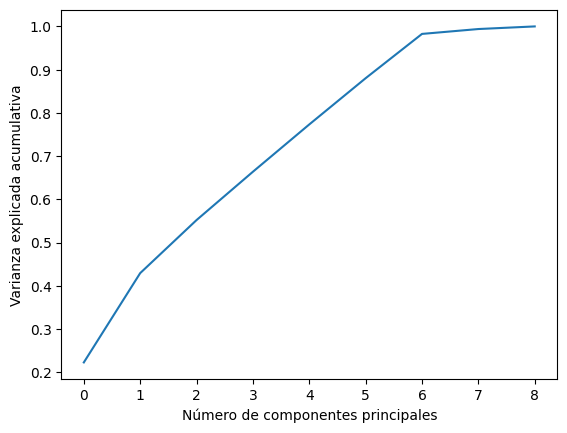

In [5]:
from sklearn.decomposition import PCA

# Cargar tus datos desde el archivo CSV
data = pd.read_csv('trainingsetPCA.csv')

# Separar las características (X) de la variable objetivo si la hay (y)
X = data.drop('X7', axis=1)  # Ajusta 'variable_objetivo' según tu conjunto de datos

# Estandarizar los datos
from sklearn.preprocessing import StandardScaler
X_standardized = StandardScaler().fit_transform(X)

# Inicializar el modelo PCA
pca = PCA()

# Ajustar y transformar los datos
X_pca = pca.fit_transform(X_standardized)

# Calcular la varianza explicada acumulativa
explained_variance_ratio_cumulative = pca.explained_variance_ratio_.cumsum()

# Graficar la varianza explicada acumulativa
plt.plot(explained_variance_ratio_cumulative)
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulativa')
plt.show()


Viendo los codos que se producen en la grafica, podriamos quedarnos con las clases desde la 1 hasta la 6 y manteniendo mas del 94% de la informacioni y eliminando 4000 datos (los de la clase de 7,8, 9 y 10) que no aportan mas de un 6% de la información util del dataset original pudiendo así optimizar el entrenamientos de modelos como Kmeans que su coste aumenta en funcion del numero de datos del dataset.

Ejercicio 3. Máquinas de Soporte Vectorial (SVM).

El archivo “trainingsetSVM1.csv” contiene los datos de un conjunto de entrenamiento
formado por 3 características de entrada y 2 posibles clases de salida.
A continuación, resuelva los siguientes apartados:

**3.1. Realice un script de Python en el que se representen en una figura los datos del set de entrenamiento “trainingsetSVM1.csv” de manera que se distingan las clases entre sí. ¿Qué forma dibujan los datos de entrenamiento?**

           X1        X2        X3  Y
0   -1.412992 -2.809407  0.001133 -1
1    1.844410 -2.398277  0.001637 -1
2    0.286877  0.246673  0.148162  1
3    0.097138 -0.272599  0.152628  1
4    0.817198  1.791562  0.022900 -1
..        ...       ...       ... ..
778 -1.203463  1.021426  0.045790 -1
779 -1.400349  0.216808  0.058317 -1
780 -0.282797  0.662258  0.122805  1
781 -0.846693 -0.073775  0.110909  1
782  0.789045  1.228722  0.054801 -1

[783 rows x 4 columns]


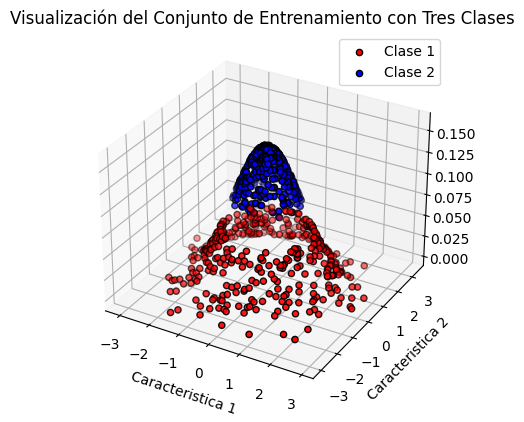

tiene forma de campana de Gauss


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el conjunto de entrenamiento desde el archivo CSV
df = pd.read_csv("trainingsetSVM1.csv")
print(df)

# Separar los datos en dos clases
clase1 = df[df['Y'] == -1]
clase2 = df[df['Y'] == 1]

# Crear el gráfico de dispersión
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clase1['X1'], clase1['X2'], clase1['X3'], label='Clase 1', c='r', marker='o', edgecolor='black')
ax.scatter(clase2['X1'], clase2['X2'], clase2['X3'], label='Clase 2', c='b', marker='o', edgecolor='black')

# Etiquetas y leyenda
plt.xlabel('Caracteristica 1')
plt.ylabel('Caracteristica 2')
plt.legend()
plt.title('Visualización del Conjunto de Entrenamiento con Tres Clases')

# Mostrar el gráfico
plt.show()
print("tiene forma de campana de Gauss que en 3D se asemeja a una forma conica")

3.2. A continuación genere el modelo basado en SVM utilizando funciones de alto nivel
proporcionadas por Scikit-Learn, estableciendo una función Kernel de tipo lineal.
Posteriormente, realice un código que represente de forma aproximada el hiperplano de
separación óptimo entre clases.

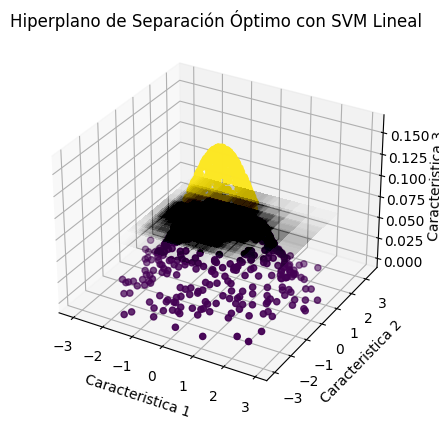

In [7]:
from sklearn import svm

# Definir las características y las etiquetas
X = df[['X1', 'X2', 'X3']]
y = df['Y']

# Crear un clasificador SVM con un kernel lineal
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Obtener los coeficientes del hiperplano y el sesgo
w = clf.coef_[0]
b = clf.intercept_[0]

# Crear el gráfico 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Puntos de datos
ax.scatter(X['X1'], X['X2'], X['X3'], c=y, marker='o')

# Definir el hiperplano de separación óptimo
xx, yy = np.meshgrid(X['X1'], X['X2'])
zz = (-w[0] * xx - w[1] * yy - b) / w[2]

# Visualizar el hiperplano de separación
ax.plot_surface(xx, yy, zz, alpha=0.005, color='k')

# Etiquetas
ax.set_xlabel('Caracteristica 1')
ax.set_ylabel('Caracteristica 2')
ax.set_zlabel('Caracteristica 3')
ax.set_title('Hiperplano de Separación Óptimo con SVM Lineal')

# Mostrar el gráfico
plt.show()

3.3. Para este apartado, realice un script de Python que cargue el segundo set de entrenamiento (“trainingsetSVM2.csv”). Si genera el modelo basado en SVM con una función Kernel de tipo lineal y obtiene el número de errores en la predicción de las entradas del set de entrenamiento utilizando el modelo generado. ¿Por qué el número de errores no es igual a cero?

In [8]:
from sklearn.metrics import zero_one_loss

# Cargar el conjunto de entrenamiento desde el archivo CSV
df = pd.read_csv("trainingsetSVM2.csv")

# Definir las características y las etiquetas
X = df[['X1', 'X2', 'X3']]
y = df['Y']

# Crear un clasificador SVM con un kernel lineal
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

# Realizar predicciones en el conjunto de entrenamiento
y_pred = clf.predict(X)

# Calcular el número de errores en la predicción
errores = zero_one_loss(y, y_pred, normalize=False)

# Mostrar el número de errores
print(f"Número de errores en la predicción: {errores}")


Número de errores en la predicción: 89


El número de errores no es cero porque no es un ejemplo linealmente separable.

3.4. Vuelva a generar el modelo utilizando el segundo set de datos de entrenamiento, pero en esta ocasión con una función Kernel polinomial. ¿Qué errores de predicción del conjunto de datos se consiguen variando el grado del polinomio utilizado en el Kernel?

In [9]:
# Definir diferentes grados del polinomio
grados_polinomio = np.arange(1, 20)

# Iterar sobre los diferentes grados del polinomio
for grado in grados_polinomio:
    # Crear un clasificador SVM con un kernel polinomial y el grado actual
    clf = svm.SVC(kernel='poly', degree=grado, coef0=1)
    clf.fit(X, y)

    # Realizar predicciones en el conjunto de entrenamiento
    y_pred = clf.predict(X)

    # Calcular el número de errores en la predicción
    errores = zero_one_loss(y, y_pred, normalize=False)

    # Mostrar el número de errores para el grado actual
    print(f"Número de errores en la predicción (grado {grado}): {errores}")


Número de errores en la predicción (grado 1): 89
Número de errores en la predicción (grado 2): 89
Número de errores en la predicción (grado 3): 89
Número de errores en la predicción (grado 4): 89
Número de errores en la predicción (grado 5): 58
Número de errores en la predicción (grado 6): 28
Número de errores en la predicción (grado 7): 14
Número de errores en la predicción (grado 8): 12
Número de errores en la predicción (grado 9): 8
Número de errores en la predicción (grado 10): 6
Número de errores en la predicción (grado 11): 5
Número de errores en la predicción (grado 12): 5
Número de errores en la predicción (grado 13): 4
Número de errores en la predicción (grado 14): 2
Número de errores en la predicción (grado 15): 2
Número de errores en la predicción (grado 16): 0
Número de errores en la predicción (grado 17): 0
Número de errores en la predicción (grado 18): 0
Número de errores en la predicción (grado 19): 0
